<a href="https://colab.research.google.com/github/Sidharth-NK/ML_PROJECTS/blob/main/Handwritten_digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# this make sure that the plots are displayed within the notebook and not in seperate windows
%matplotlib inline
import numpy as np

In [12]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [13]:
len(x_train)

60000

In [14]:
x_train.shape

(60000, 28, 28)

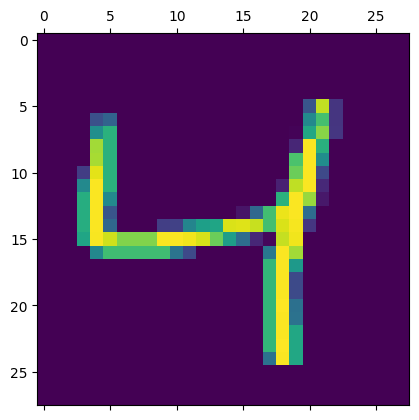

In [15]:
plt.matshow(x_train[2])

In [16]:
# used to scale down the values between 0 - 1. This is to increase accuracy and maintain consisitency among different datasets.
x_train = x_train/255
x_test = x_test/255

In [19]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Now we need to flatten the input data from 28x28 to column matrix

In [20]:
# flattens the trining and test data into a single column matrix. so that it can be fed into a neural network.
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

now we need to create a simple neural netwok using tensor and keras


In [21]:
# Here sequential means i am having a stack of layers in my neural network
model = keras.Sequential([
     keras.layers.Dense(units=10,input_shape=(784,),activation='sigmoid') #10 units means 10 neurons output
])
model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy', # our output variable y_train is an integer number.
    metrics=['accuracy'] # goal is to make it more accurate
)
model.fit(x_train_flattened,y_train,epochs=5) # this is where the training happens. supplying the traiing set.actually the flattened training set. we didnt flatten the y_train

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8205 - loss: 0.7041
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9136 - loss: 0.3079
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9202 - loss: 0.2884
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9238 - loss: 0.2658
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9271 - loss: 0.2641


Now lets try to evaluate the accuracy on test data set, cuz when it is running training it is evaluating accuracy on training data set.

but when we deploy the model for production we need to always check the accuracy of a test dataset.

In [24]:
model.evaluate(x_test_flattened,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9117 - loss: 0.3064


[0.26851996779441833, 0.9246000051498413]

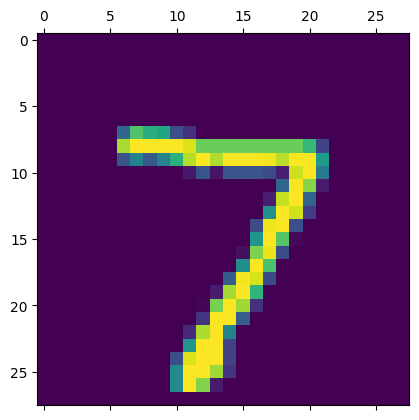

In [28]:
plt.matshow(x_test[0])

In [29]:
# Sample prediction
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([2.3743369e-02, 3.3389003e-07, 6.9861360e-02, 9.6225667e-01,
       2.8231288e-03, 1.0545244e-01, 6.6686056e-07, 9.9983805e-01,
       9.9799983e-02, 6.4991224e-01], dtype=float32)

In [30]:
np.argmax(y_predicted[0])

np.int64(7)

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

to see how prediction look like , we look at confusion matrix

In [32]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    7,  934,   17,    8,    5,   11,   10,   33,    4],
       [   2,    0,   20,  927,    0,   26,    1,   12,   15,    7],
       [   2,    1,    8,    2,  918,    0,    7,    4,   10,   30],
       [   8,    2,    6,   37,    8,  779,    8,    7,   31,    6],
       [  15,    3,   13,    1,    7,   19,  896,    2,    2,    0],
       [   1,    5,   23,    8,    6,    0,    0,  959,    2,   24],
       [   8,    8,    7,   28,    9,   32,    8,   13,  855,    6],
       [  11,    7,    1,   13,   34,    6,    0,   32,    6,  899]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

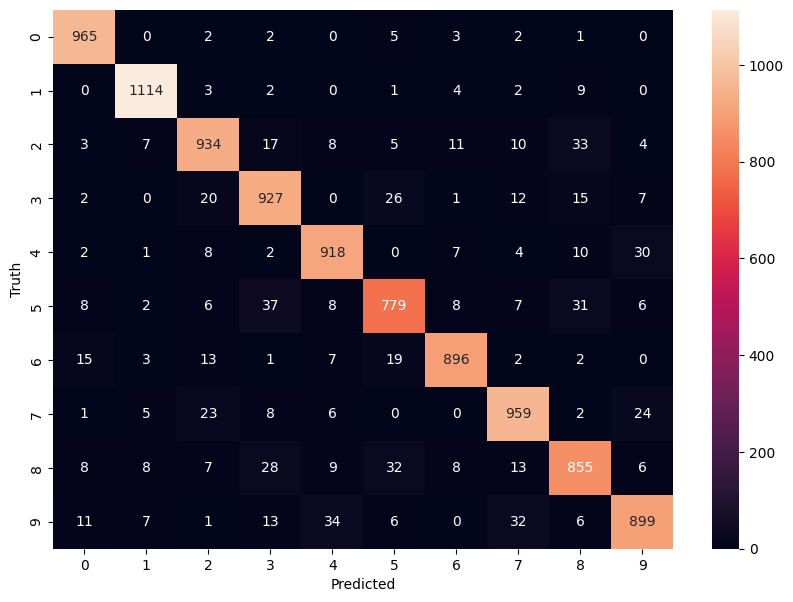

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

adding a hidden layer


In [37]:
# Here sequential means i am having a stack of layers in my neural network
model = keras.Sequential([
     keras.layers.Dense(100,input_shape=(784,),activation='relu'), #10 units means 10 neurons output
     keras.layers.Dense(20,activation = 'relu'),
     keras.layers.Dense(units=10,activation='sigmoid') # last layer doesnt need input shapoe. it can assume from the first shape
])
model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=7) # this is where the training happens

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8438 - loss: 0.5152
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9584 - loss: 0.1374
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9710 - loss: 0.0937
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9801 - loss: 0.0650
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9847 - loss: 0.0518
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9866 - loss: 0.0428
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9875 - loss: 0.0376


In [40]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9695 - loss: 0.1125


[0.09884391725063324, 0.9735999703407288]

Text(95.72222222222221, 0.5, 'Truth')

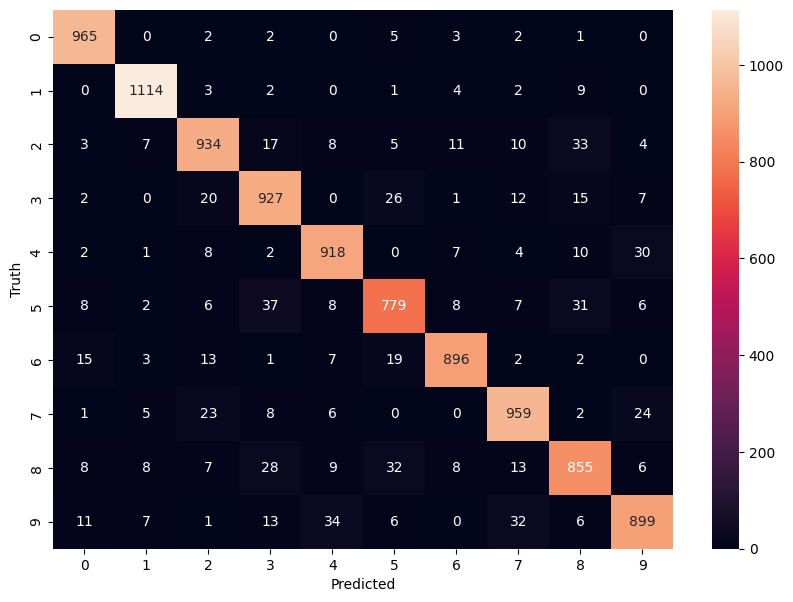

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
# Here sequential means i am having a stack of layers in my neural network
model = keras.Sequential([
     keras.layers.Flatten(input_shape = (28,28)),
     keras.layers.Dense(100,activation='relu'), #10 units means 10 neurons output
     keras.layers.Dense(20,activation = 'relu'),
     keras.layers.Dense(units=10,activation='sigmoid') # last layer doesnt need input shapoe. it can assume from the first shape
])
model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=7) # this is where the training happens

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8493 - loss: 0.5038
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9609 - loss: 0.1295
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9730 - loss: 0.0876
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9801 - loss: 0.0631
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9850 - loss: 0.0484
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9868 - loss: 0.0409
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9899 - loss: 0.0316


In [44]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.1011


[0.08104851841926575, 0.9761999845504761]

In [48]:
y_predict = model.predict(x_test)
y_predict[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.1133488e-01, 6.5272236e-01, 9.2245173e-01, 9.8901707e-01,
       7.4643003e-06, 2.3242386e-04, 2.5190204e-02, 9.9999833e-01,
       6.0810041e-01, 9.2547975e-02], dtype=float32)

np.int64(7)

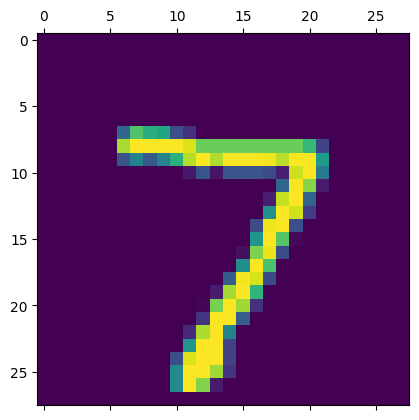

In [55]:
plt.matshow(x_test[0])
np.argmax(y_predict[0])